In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosde/Analitica_Sabana_Completo/main/init.py
import init; init.init(force_download=False); 

## **Preparando los datos**

Con algunas líneas de código, debemos ser capaces de dejar nuestros datos listos para el análisis

### **Limpiando datos**

Para ser útil para la mayoría de las tareas de analítica, los datos deben estar limpios. Esto significa que debe ser coherente, relevante y estandarizado. Para ello se recomienda
* Remover los outliers (datos atípicos);
* Remover valores inapropiados;
* Remover valores duplicados;
* Remover puntuación;
* Remover espacios en blanco;
* Estandarizar datos; y 
* Estandarizar texto.

### **Calculando y removiendo outliers**

Encontrar los valores atípicos le permite eliminar los valores que son tan altos o tan bajos que sesgan la vista general de los datos.

Vamos a considerar dos formas principales de detectar outliers:

### **1. Desviación Estándar**: 
Si los datos están normalmente distribuidos, entonces el 95% de los datos están dentro de 1.96 desviaciones estándar de la media. Entonces podemos eliminar los valores por encima o por debajo de ese rango.

### **2. Rango Intercuartílico ($IQR$, por sus siglas en inglés)**:
 El IQR es la diferencia entre el cuartíl $Q_1$ y el cuartíl $Q_3$, cualquier valor que esté por debajo de $Q_1 - 1.5IQR$ o mayor que $Q_3 + 1.5IQR$ son tratados como outliers y son removidos.






### **Método 1. Desviación Estándar**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [192]:
df = pd.read_csv('local/data/gradedata.csv')
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [193]:
df.shape

(2000, 8)

<AxesSubplot:xlabel='grade', ylabel='Count'>

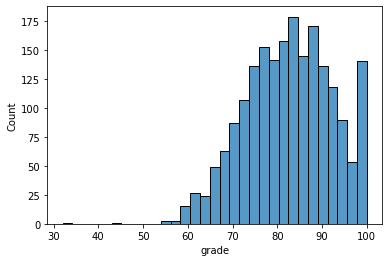

In [194]:
sns.histplot(x = df['grade'], data= df)

In [195]:
meangrade = df['grade'].mean() #Calculamos la media de la columna 'grade'
stdgrade = df['grade'].std() #Calculamos la desviación estándar de la columna 'grade'
toprange = meangrade + 1.96*stdgrade #El máximo del rango intercuartílico
botrange = meangrade - 1.96*stdgrade #El míximo del rango intercuartílico
copydf = df #Se genera un nuevo DataFrame
copydf = copydf.drop(copydf[copydf['grade']> toprange].index) #Se eliminan los datos que cumplen la condición (oputliers por arriba)
copydf = copydf.drop(copydf[copydf['grade']< botrange].index)
copydf.shape #Se eliminan los datos que cumplen la condición (outliers por abajo)
copydf.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [196]:
copydf.shape

(1946, 8)

<AxesSubplot:xlabel='grade', ylabel='Count'>

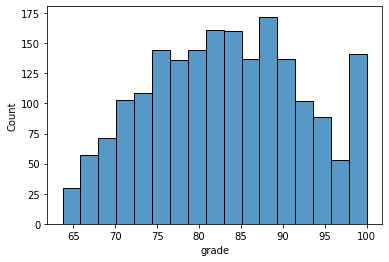

In [221]:
sns.histplot(x = copydf['grade'], data= copydf)

### **Metodo 2. Rango Intercuartílico**

In [197]:
q1 = df['grade'].quantile(.25)
q3 = df['grade'].quantile(.75)
iqr = q3 - q1
toprange_q = q3 + iqr*1.5
botrange_q = q1 - iqr*1.5
copydf_q = df
copydf_q = copydf_q.drop(copydf_q[copydf_q['grade']>toprange_q].index)
copydf_q = copydf_q.drop(copydf_q[copydf_q['grade']<botrange_q].index)
copydf_q.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [198]:
copydf_q.shape

(1998, 8)

<AxesSubplot:xlabel='grade', ylabel='Count'>

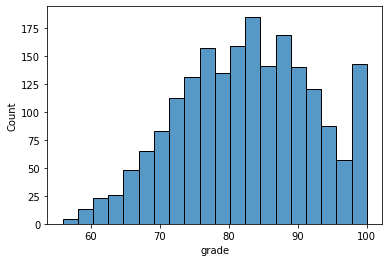

In [223]:
sns.histplot(x = copydf_q['grade'], data= copydf_q)

## **Datos faltantes en DataFrames de Pandas**

Una de las cosas que más incomoda al trabajar con grandes volumenes de datos es encontrar el dato que falta. Puede hacer que sea imposible o impredecible de calcular la mayoría de las estadísticas agregadas o generar tablas dinámicas.

Pandas posee funciones que ayudan a hallar, borrar y cambiar los datos faltantes.

In [202]:
df1 = pd.read_csv('local/data/gradedatamissing.csv')
df1.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [203]:
df1.shape

(2002, 8)

Primero determinamos si exisen datos NAN en el DataFrame

In [204]:
df1.isna().sum().sum()

27

Para eliminar todas las columnas con datos faltantes (NaN), usamos las siguiente función

In [205]:
df1_no_missing = df1.dropna()
df1_no_missing

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
...,...,...,...,...,...,...,...,...
1997,Cody,Shepherd,male,19.0,1.0,8.0,80.1,"982 West Street, Alexandria, VA 22304"
1998,Geraldine,Peterson,female,16.0,4.0,18.0,100.0,"78 Morris Street, East Northport, NY 11731"
1999,Mercedes,Leon,female,18.0,3.0,14.0,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
2000,Lucius,Rowland,male,16.0,1.0,7.0,69.1,"342 West Meadowbrook Lane, Helena, MT 59601"


In [206]:
df1_no_missing.shape

(1984, 8)

In [207]:
df1.dropna(axis= 1, how= 'all')

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
...,...,...,...,...,...,...,...,...
1997,Cody,Shepherd,male,19.0,1.0,8.0,80.1,"982 West Street, Alexandria, VA 22304"
1998,Geraldine,Peterson,female,16.0,4.0,18.0,100.0,"78 Morris Street, East Northport, NY 11731"
1999,Mercedes,Leon,female,18.0,3.0,14.0,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
2000,Lucius,Rowland,male,16.0,1.0,7.0,69.1,"342 West Meadowbrook Lane, Helena, MT 59601"


In [208]:
df1.fillna(0)

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
...,...,...,...,...,...,...,...,...
1997,Cody,Shepherd,male,19.0,1.0,8.0,80.1,"982 West Street, Alexandria, VA 22304"
1998,Geraldine,Peterson,female,16.0,4.0,18.0,100.0,"78 Morris Street, East Northport, NY 11731"
1999,Mercedes,Leon,female,18.0,3.0,14.0,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
2000,Lucius,Rowland,male,16.0,1.0,7.0,69.1,"342 West Meadowbrook Lane, Helena, MT 59601"


In [209]:
df1['grade'].fillna(df1['grade'].mean(), inplace=True)
df1

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
...,...,...,...,...,...,...,...,...
1997,Cody,Shepherd,male,19.0,1.0,8.0,80.1,"982 West Street, Alexandria, VA 22304"
1998,Geraldine,Peterson,female,16.0,4.0,18.0,100.0,"78 Morris Street, East Northport, NY 11731"
1999,Mercedes,Leon,female,18.0,3.0,14.0,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
2000,Lucius,Rowland,male,16.0,1.0,7.0,69.1,"342 West Meadowbrook Lane, Helena, MT 59601"


In [210]:
df1['grade'].fillna(df1.groupby('gender')['grade'].transform('mean'), inplace= True)
df1.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [211]:
df1[df1['age'].notnull() & df1['gender'].notnull()]

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
...,...,...,...,...,...,...,...,...
1997,Cody,Shepherd,male,19.0,1.0,8.0,80.1,"982 West Street, Alexandria, VA 22304"
1998,Geraldine,Peterson,female,16.0,4.0,18.0,100.0,"78 Morris Street, East Northport, NY 11731"
1999,Mercedes,Leon,female,18.0,3.0,14.0,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
2000,Lucius,Rowland,male,16.0,1.0,7.0,69.1,"342 West Meadowbrook Lane, Helena, MT 59601"


## **Filtrando valores inapropiados**

In [212]:
fname = ['Bob','Jessica','Mary','John','Mel']
lname = ['Smith', 'Pitt', 'Parker', 'Cage', 'Lynch']
gender = ['male', 'female', 'female', 'male', 'male']
age = [18.0, 16.0, 17.0, 19.0, 17.0]
exercise = [2.0, 1.0, 4.0, 3.0, 1.0]
hours = [1.0, 8.0, 17.0, 14.0, 9.0]
grades = [76,-2,77,78,101]
address = ['8839 Marshall St., Miami, FL 35125', '33 Spring Dr., Taunton, MA 02710',
            '30 Glenridge Rd., Bountiful, UT 84510', '942 West Street, Alexandria, VA 22304',
            '85 Homestead Drive, Voorhees, NJ 08043']

In [213]:
data1 = {'fname' : ['Bob','Jessica','Mary','John','Mel'], 
         'lname' : ['Smith', 'Pitt', 'Parker', 'Cage', 'Lynch'], 
         'gender' : ['male', 'female', 'female', 'male', 'male'],
         'age' : [18.0, 16.0, 17.0, 19.0, 17.0],
         'exercise' : [2.0, 1.0, 4.0, 3.0, 1.0],
         'hours' : [1.0, 8.0, 17.0, 14.0, 9.0],
         'grade' : [76.0,-2.0,77.0,78.0,101.0],
         'address' : ['8839 Marshall St., Miami, FL 35125', '33 Spring Dr., Taunton, MA 02710',
            '30 Glenridge Rd., Bountiful, UT 84510', '942 West Street, Alexandria, VA 22304',
            '85 Homestead Drive, Voorhees, NJ 08043']
         }

In [214]:
df2 = pd.DataFrame(data = data1)
df2

,fname,lname,gender,age,exercise,hours,grade,address
0,Bob,Smith,male,18.0,2.0,1.0,76.0,"8839 Marshall St., Miami, FL 35125"
1,Jessica,Pitt,female,16.0,1.0,8.0,-2.0,"33 Spring Dr., Taunton, MA 02710"
2,Mary,Parker,female,17.0,4.0,17.0,77.0,"30 Glenridge Rd., Bountiful, UT 84510"
3,John,Cage,male,19.0,3.0,14.0,78.0,"942 West Street, Alexandria, VA 22304"
4,Mel,Lynch,male,17.0,1.0,9.0,101.0,"85 Homestead Drive, Voorhees, NJ 08043"


In [215]:
df1 = df1.append(df2, ignore_index= True)
df1

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
...,...,...,...,...,...,...,...,...
2002,Bob,Smith,male,18.0,2.0,1.0,76.0,"8839 Marshall St., Miami, FL 35125"
2003,Jessica,Pitt,female,16.0,1.0,8.0,-2.0,"33 Spring Dr., Taunton, MA 02710"
2004,Mary,Parker,female,17.0,4.0,17.0,77.0,"30 Glenridge Rd., Bountiful, UT 84510"
2005,John,Cage,male,19.0,3.0,14.0,78.0,"942 West Street, Alexandria, VA 22304"


In [226]:
pd.concat([df1, df2], ignore_index=True)

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
...,...,...,...,...,...,...,...,...
2007,Bob,Smith,male,18.0,2.0,1.0,76.0,"8839 Marshall St., Miami, FL 35125"
2008,Jessica,Pitt,female,16.0,1.0,8.0,-2.0,"33 Spring Dr., Taunton, MA 02710"
2009,Mary,Parker,female,17.0,4.0,17.0,77.0,"30 Glenridge Rd., Bountiful, UT 84510"
2010,John,Cage,male,19.0,3.0,14.0,78.0,"942 West Street, Alexandria, VA 22304"


In [216]:
df1['grade'].mean()

82.51455485799703

In [217]:
df1.loc[df1['grade']>100]

,fname,lname,gender,age,exercise,hours,grade,address
2006,Mel,Lynch,male,17.0,1.0,9.0,101.0,"85 Homestead Drive, Voorhees, NJ 08043"


In [218]:
df1.loc[df1['grade']<0]

,fname,lname,gender,age,exercise,hours,grade,address
2003,Jessica,Pitt,female,16.0,1.0,8.0,-2.0,"33 Spring Dr., Taunton, MA 02710"


In [219]:
df1.loc[(df1['grade']>=100, 'grade')]= 100
df1

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
...,...,...,...,...,...,...,...,...
2002,Bob,Smith,male,18.0,2.0,1.0,76.0,"8839 Marshall St., Miami, FL 35125"
2003,Jessica,Pitt,female,16.0,1.0,8.0,-2.0,"33 Spring Dr., Taunton, MA 02710"
2004,Mary,Parker,female,17.0,4.0,17.0,77.0,"30 Glenridge Rd., Bountiful, UT 84510"
2005,John,Cage,male,19.0,3.0,14.0,78.0,"942 West Street, Alexandria, VA 22304"


In [220]:
df1.loc[(df1['grade']<0, 'grade')]= 0
df1


,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17.0,3.0,10.0,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18.0,4.0,4.0,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18.0,5.0,9.0,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14.0,2.0,7.0,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18.0,4.0,15.0,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
...,...,...,...,...,...,...,...,...
2002,Bob,Smith,male,18.0,2.0,1.0,76.0,"8839 Marshall St., Miami, FL 35125"
2003,Jessica,Pitt,female,16.0,1.0,8.0,0.0,"33 Spring Dr., Taunton, MA 02710"
2004,Mary,Parker,female,17.0,4.0,17.0,77.0,"30 Glenridge Rd., Bountiful, UT 84510"
2005,John,Cage,male,19.0,3.0,14.0,78.0,"942 West Street, Alexandria, VA 22304"
